In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [2]:
experiment = "01_Multiplication" # 506
# experiment = "02_Compare" # 507|508|509
# experiment = "05_Reveal" # 512
# experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
# experiment = "09_SecureMin" # 516|517|518
# experiment = "11_Auction" # 521|522|523
# experiment = "15_BitAND" # 524
# experiment = "16_Division" # 510

data=[]
framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]

base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [3]:
import pandas as pd


In [4]:
# fl_paths[-1].split("/")[-2]

In [5]:
# runtime/3600

mean bandwidths(Mbs)
100      0.190994
1000     0.027998
10000    0.011986
25000    0.013654
Name: runtime_external(s), dtype: float64
mean bandwidths(Mbs)
100      0.026998
1000     0.019992
10000    0.014988
25000    0.016990
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      1.826000
1000     0.649000
10000    0.550000
25000    0.552414
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      1.757000
1000     0.566000
10000    0.465000
25000    0.473793
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      99.81500
1000     11.58400
10000     5.60700
25000     5.75069
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      3.596000
1000     0.775000
10000    0.553000
25000    0.540345
Name: runtime_external(s), dtype: float64
1000000
mean bandwidths(Mbs)
100      1.004000
1000     0.416000
10000    0.357000
25000    0.364483
Name: runtime_external(s), dtype: float64
['HPMPC', 'MP-S

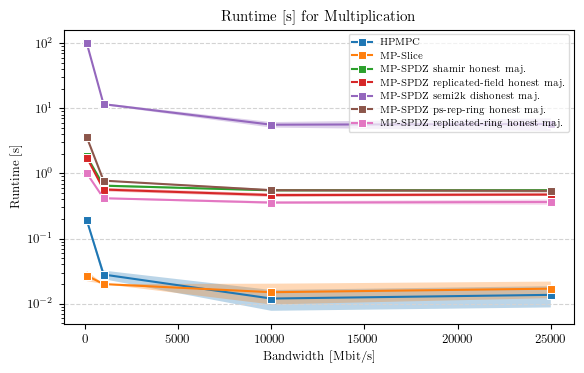

In [14]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[0] # AUCTION
# del bandwidth[1]
# del bandwidth[2]
# del bandwidth[-2]
# del bandwidth[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[0] # AES
# del label[-1]
# del bandwidth[0]
# del bandwidth[-1]

# del bandwidth[3] # DIVISION
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

label = ['HPMPC', 'MP-Slice', 'MP-SPDZ shamir honest maj.', 'MP-SPDZ replicated-field honest maj.', 'MP-SPDZ semi2k dishonest maj.', 'MP-SPDZ ps-rep-ring honest maj.', 'MP-SPDZ replicated-ring honest maj.']

print(label)
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

mean latencies(ms)
0     0.013654
25    0.437990
50    0.863995
75    1.289998
Name: runtime_external(s), dtype: float64
mean latencies(ms)
0    0.01699
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0     0.552414
25    2.941000
50    5.230000
75    7.543000
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0     0.473793
25    2.715000
50    4.880000
75    7.020000
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0      5.75069
25    22.04500
50    40.74500
75    59.66700
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0      0.540345
25     3.442000
50     6.217000
75    10.159000
Name: runtime_external(s), dtype: float64
1000000
mean latencies(ms)
0     0.364483
25    2.514000
50    4.531000
75    6.591000
Name: runtime_external(s), dtype: float64


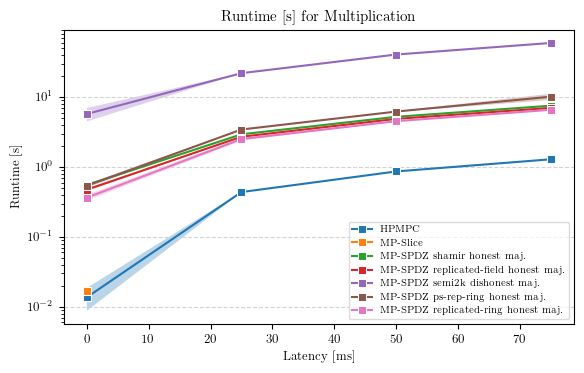

In [15]:
latency,label=rf.get_latency_deviation(data)
# del latency[0] # AUCTION
# del latency[1]
# del latency[2]
# del latency[-2]
# del latency[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[0] # AES
# del label[-1]
# del latency[0]
# del latency[-1]

# del latency[3] # DIVISION
# del latency[3]
# del label[3]
# del label[3]

# del latency[-2] # secure min
# del latency[-2]
# del label[-2]
# del label[-2]

label = ['HPMPC', 'MP-Slice', 'MP-SPDZ shamir honest maj.', 'MP-SPDZ replicated-field honest maj.', 'MP-SPDZ semi2k dishonest maj.', 'MP-SPDZ ps-rep-ring honest maj.', 'MP-SPDZ replicated-ring honest maj.']

# print(latency)
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

<>:28: SyntaxWarning: invalid escape sequence '\%'
<>:28: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_13472/2646657545.py:28: SyntaxWarning: invalid escape sequence '\%'
  rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [\%]","Runtime [s]",True)


mean packetdrops(%)
0    0.013654
1    1.152991
2    1.634993
5    4.935544
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.01699
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.552414
1    2.300000
2    2.721000
5    9.310000
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.473793
1    2.039000
2    2.734000
5    7.745000
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0     5.75069
1     8.08900
2    12.15100
5    35.96200
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.540345
1    2.336000
2    3.040000
5    7.347000
Name: runtime_external(s), dtype: float64
mean packetdrops(%)
0    0.364483
1    1.834000
2    2.979000
5    6.378000
Name: runtime_external(s), dtype: float64


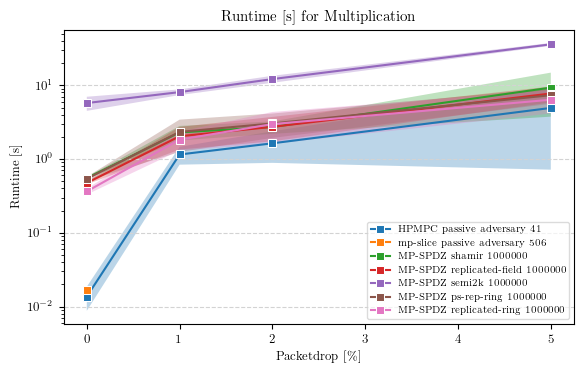

In [8]:
packetdrop,label=rf.get_packetdrop_deviation(data)
# del packetdrop[0] # AUCTION
# del packetdrop[1]
# del packetdrop[2]
# del packetdrop[-2]
# del packetdrop[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[0] # AES
# del label[-1]
# del packetdrop[0]
# del packetdrop[-1]

# del packetdrop[3] # Division
# del packetdrop[3]
# del label[3]
# del label[3]

# del packetdrop[-2] # secure min
# del packetdrop[-2]
# del label[-2]
# del label[-2]
# print(packetdrop)
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [\%]","Runtime [s]",True)

In [9]:
[df['mean'].iloc[0] for df in bandwidth]

[0.19099439999999998,
 0.0269976,
 1.826,
 1.7570000000000001,
 99.815,
 3.596,
 1.004]

In [10]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.011003193427364631,
 0.004834323282528797,
 0.015055453054181631,
 0.018287822299126948,
 1.2233673928047,
 0.017126976771553382,
 0.014298407059684819]

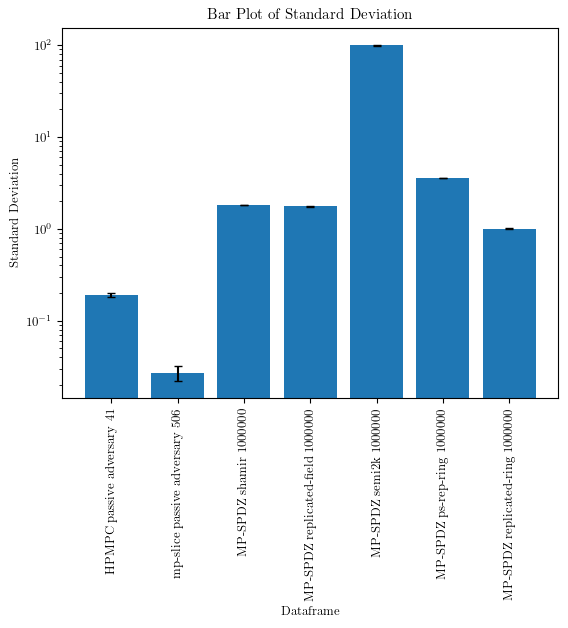

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()


In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Example data
# fig, ax = plt.subplots()
# deviation61 = data[0].loc[(data[0]['function'] == 507) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation62 = data[0].loc[(data[0]['function'] == 508)  & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# deviation63 = data[0].loc[(data[0]['function'] == 509) & (data[0]['packetdrops(%)'] == 0) & (data[0]['latencies(ms)'] == 0) & (data[0]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
# 
# # Plot the first violin plot
# two_dimensional_list = [deviation61, deviation62, deviation63]
# ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# # Set the x-tick labels
# ax.set_xticks([1, 2, 3])
# ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])
# 
# 
# # Set plot title and labels
# plt.title("Devation of runtime for HP-MPC Logistic Regression")
# plt.xlabel("Comparison Type")
# plt.ylabel("Runtime [s]")
# ax.figure.set_size_inches(5.91, 2.8)
# fig.tight_layout()
# plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
# plt.show()